<a href="https://colab.research.google.com/github/DanielKorenDataScience/EDA_US_Accidents/blob/master/Regression_Project_CategorialOneColumn_ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Laptop-Prices-prediction-using-Regression-ML-model" data-toc-modified-id="Laptop-Prices-prediction-using-Regression-ML-model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><strong>Laptop Prices prediction using Regression ML model</strong></a></span></li><li><span><a href="#Source-link" data-toc-modified-id="Source-link-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><strong>Source link</strong></a></span></li><li><span><a href="#Preliminary" data-toc-modified-id="Preliminary-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><strong>Preliminary</strong></a></span></li><li><span><a href="#Knowing-the-data" data-toc-modified-id="Knowing-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><strong>Knowing the data</strong></a></span></li><li><span><a href="#Conclusions:" data-toc-modified-id="Conclusions:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusions:</a></span></li><li><span><a href="#EDA---Data-Exploration" data-toc-modified-id="EDA---Data-Exploration-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><strong>EDA - Data Exploration</strong></a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><strong>Data Cleaning</strong></a></span></li><li><span><a href="#Data-Manipulation" data-toc-modified-id="Data-Manipulation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span><strong>Data Manipulation</strong></a></span></li><li><span><a href="#Decision-Tree-Model" data-toc-modified-id="Decision-Tree-Model-9"><span class="toc-item-num">9&nbsp;&nbsp;</span><strong>Decision Tree Model</strong></a></span></li><li><span><a href="#remove-Ram" data-toc-modified-id="remove-Ram-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>remove Ram</a></span></li><li><span><a href="#remove-all-prediction-more-3000" data-toc-modified-id="remove-all-prediction-more-3000-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>remove all prediction more 3000</a></span></li><li><span><a href="#Random-Forest-Model" data-toc-modified-id="Random-Forest-Model-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Random Forest Model</a></span></li><li><span><a href="#randomForest-after-Grid-search" data-toc-modified-id="randomForest-after-Grid-search-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>randomForest after Grid search</a></span></li><li><span><a href="#change-columns-type-to-category" data-toc-modified-id="change-columns-type-to-category-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>change columns type to category</a></span></li><li><span><a href="#split-data" data-toc-modified-id="split-data-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>split data</a></span></li><li><span><a href="#split-less-then-3000" data-toc-modified-id="split-less-then-3000-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>split less then 3000</a></span></li><li><span><a href="#final-df" data-toc-modified-id="final-df-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>final df</a></span></li><li><span><a href="#end-code-of-itay" data-toc-modified-id="end-code-of-itay-18"><span class="toc-item-num">18&nbsp;&nbsp;</span>end code of itay</a></span></li><li><span><a href="#if-required-to-re-run-the-model" data-toc-modified-id="if-required-to-re-run-the-model-19"><span class="toc-item-num">19&nbsp;&nbsp;</span>if required to re-run the model</a></span></li><li><span><a href="#Linear-Regression-Model" data-toc-modified-id="Linear-Regression-Model-20"><span class="toc-item-num">20&nbsp;&nbsp;</span>Linear Regression Model</a></span></li><li><span><a href="#K-Nearest-Neighbors-Model" data-toc-modified-id="K-Nearest-Neighbors-Model-21"><span class="toc-item-num">21&nbsp;&nbsp;</span>K Nearest Neighbors Model</a></span></li></ul></div>

<a href="https://colab.research.google.com/github/DanielKorenDataScience/RegressionProject/blob/main/Regression%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laptop Prices prediction using Regression ML model**

# **Source link**

https://www.kaggle.com/muhammetvarl/laptop-price

# **Preliminary**

In [306]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import requests
import sys
import os
import re

# For transformations and predictions
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances
from sklearn.ensemble import RandomForestRegressor

# For the tree visualization
import pydot
from IPython.display import Image
from sklearn.externals.six import StringIO

# For scoring
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_squared_error as mse

# For validation
from sklearn.model_selection import train_test_split as split

%matplotlib inline

In [307]:
data_url = 'https://raw.githubusercontent.com/DanielKorenDataScience/RegressionProject/master/laptop_price.csv'
resp = requests.get(data_url)
text = resp.text

with open('laptop_price.csv', 'w') as fh:
    fh.write(text)
  
df = pd.read_csv('laptop_price.csv')

In [308]:
df = pd.read_csv('laptop_price.csv', encoding='ISO-8859–1')

In [309]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


# **Knowing the data**

In [311]:
df.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [312]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [313]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [314]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302
laptop_ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320
Company,Apple,Apple,HP,Apple,Apple,Acer,Apple,Apple,Asus,Acer,HP,HP,Apple,Dell,Apple,Apple,Dell,Apple,Lenovo,Dell,Asus,Lenovo,HP,Dell,HP,Dell,Apple,Dell,Dell,HP,Chuwi,Asus,HP,Dell,Apple,Lenovo,Acer,Dell,HP,HP,...,Acer,Dell,Lenovo,HP,Dell,HP,Asus,Lenovo,Lenovo,Lenovo,HP,Asus,Asus,Dell,Acer,Dell,Lenovo,HP,Dell,HP,Asus,Lenovo,Lenovo,Lenovo,HP,Asus,Asus,Dell,Acer,Dell,Lenovo,HP,Dell,HP,Asus,Lenovo,Lenovo,Lenovo,HP,Asus
Product,MacBook Pro,Macbook Air,250 G6,MacBook Pro,MacBook Pro,Aspire 3,MacBook Pro,Macbook Air,ZenBook UX430UN,Swift 3,250 G6,250 G6,MacBook Pro,Inspiron 3567,"MacBook 12""",MacBook Pro,Inspiron 3567,MacBook Pro,IdeaPad 320-15IKB,XPS 13,Vivobook E200HA,Legion Y520-15IKBN,255 G6,Inspiron 5379,15-BS101nv (i7-8550U/8GB/256GB/FHD/W10),Inspiron 3567,MacBook Air,Inspiron 5570,Latitude 5590,ProBook 470,"LapBook 15.6""",E402WA-GA010T (E2-6110/2GB/32GB/W10),17-ak001nv (A6-9220/4GB/500GB/Radeon,XPS 13,MacBook Air,IdeaPad 120S-14IAP,Aspire 3,Inspiron 5770,250 G6,ProBook 450,...,Aspire ES1-531,Inspiron 3552,IdeaPad Y700-15ISK,Pavilion 15-AW003nv,Inspiron 3567,Stream 11-Y000na,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Yoga 500-14ISK,Yoga 900-13ISK,IdeaPad 100S-14IBR,15-AC110nv (i7-6500U/6GB/1TB/Radeon,X553SA-XX031T (N3050/4GB/500GB/W10),ZenBook UX305CA-UBM1,Inspiron 3567,Aspire ES1-531,Inspiron 3552,IdeaPad Y700-15ISK,Pavilion 15-AW003nv,Inspiron 3567,Stream 11-Y000na,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Yoga 500-14ISK,Yoga 900-13ISK,IdeaPad 100S-14IBR,15-AC110nv (i7-6500U/6GB/1TB/Radeon,X553SA-XX031T (N3050/4GB/500GB/W10),ZenBook UX305CA-UBM1,Inspiron 3567,Aspire ES1-531,Inspiron 3552,IdeaPad Y700-15ISK,Pavilion 15-AW003nv,Inspiron 3567,Stream 11-Y000na,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Yoga 500-14ISK,Yoga 900-13ISK,IdeaPad 100S-14IBR,15-AC110nv (i7-6500U/6GB/1TB/Radeon,X553SA-XX031T (N3050/4GB/500GB/W10)
TypeName,Ultrabook,Ultrabook,Notebook,Ultrabook,Ultrabook,Notebook,Ultrabook,Ultrabook,Ultrabook,Ultrabook,Notebook,Notebook,Ultrabook,Notebook,Ultrabook,Ultrabook,Notebook,Ultrabook,Notebook,Ultrabook,Netbook,Gaming,Notebook,2 in 1 Convertible,Ultrabook,Notebook,Ultrabook,Notebook,Ultrabook,Notebook,Notebook,Notebook,Notebook,Ultrabook,Ultrabook,Notebook,Notebook,Notebook,Notebook,Notebook,...,Notebook,Notebook,Notebook,Notebook,Notebook,Netbook,Notebook,2 in 1 Convertible,2 in 1 Convertible,Notebook,Notebook,Notebook,Ultrabook,Notebook,Notebook,Notebook,Notebook,Notebook,Notebook,Netbook,Notebook,2 in 1 Convertible,2 in 1 Convertible,Notebook,Notebook,Notebook,Ultrabook,Notebook,Notebook,Notebook,Notebook,Notebook,Notebook,Netbook,Notebook,2 in 1 Convertible,2 in 1 Convertible,Notebook,Notebook,Notebook
Inches,13.3,13.3,15.6,15.4,13.3,15.6,15.4,13.3,14,14,15.6,15.6,15.4,15.6,12,13.3,15.6,15.4,15.6,13.3,11.6,15.6,15.6,13.3,15.6,15.6,13.3,15.6,15.6,17.3,15.6,14,17.3,13.3,13.3,14,15.6,17.3,15.6,15.6,...,15.6,15.6,15.6,15.6,15.6,11.6,15.6,14,13.3,14,15.6,15.6,13.3,15.6,15.6,15.6,15.6,15.6,15.6,11.6,15.6,14,13.3,14,15.6,15.6,13.3,15.6,15.6,15.6,15.6,15.6,15.6,11.6,15.6,14,13.3,14,15.6,15.6
ScreenResolution,IPS Panel Retina Display 2560x1600,1440x900,Full HD 1920x1080,IPS Panel Retina Display 2880x1800,IPS Panel Retina Display 2560x1600,1366x768,IPS Panel Retina Display 2880x1800,1440x900,Full HD 1920x1080,IPS Panel Full HD 1920x1080,1366x768,Full HD 1920x1080,IPS Panel Retina Display 2880

In [315]:
df.info(null_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [316]:
col = list(df.columns)
for column in col: #.split():
    print(column, ':')
#    df[column] = df[column].str.strip()
    print(df[column].value_counts())
    print()

    """ Product, Screen Resolution, CPU, Weight """

laptop_ID :
1320    1
453     1
435     1
436     1
437     1
       ..
880     1
881     1
882     1
883     1
1       1
Name: laptop_ID, Length: 1303, dtype: int64

Company :
Lenovo       297
Dell         297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Vero           4
Xiaomi         4
Fujitsu        3
Chuwi          3
Google         3
LG             3
Huawei         2
Name: Company, dtype: int64

Product :
XPS 13                                           30
Inspiron 3567                                    29
250 G6                                           21
Legion Y520-15IKBN                               19
Vostro 3568                                      19
                                                 ..
FX503VM-E4007T (i7-7700HQ/16GB/1TB                1
15-bs024nv (i5-7200U/8GB/128GB/W10)               1
E402WA-GA010T (E2-6110/2GB/32GB/W10)         

# Conclusions:
1. laptop_ID - Unique, not relevant to the model
2. Company - need to split category to columns
3. Product - ???
4. TypeName - need to split category to columns
5. Inches - need to make rounded
6. ScreenResolution - ???
7. Cpu - I think we should smart seperate to manufacturer and have the model in some other way !?
8. Ram - numeric
9. Memory - storage
10. Gpu - category to column !?
11. OpSys - Important -- category to columns 
12. Weight
13. Price_euros - ***Predict***

# **EDA - Data Exploration**

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [318]:
df.head(3)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00


In [319]:
sns.color_palette("coolwarm", as_cmap=True)
sns.set_theme(style="whitegrid")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


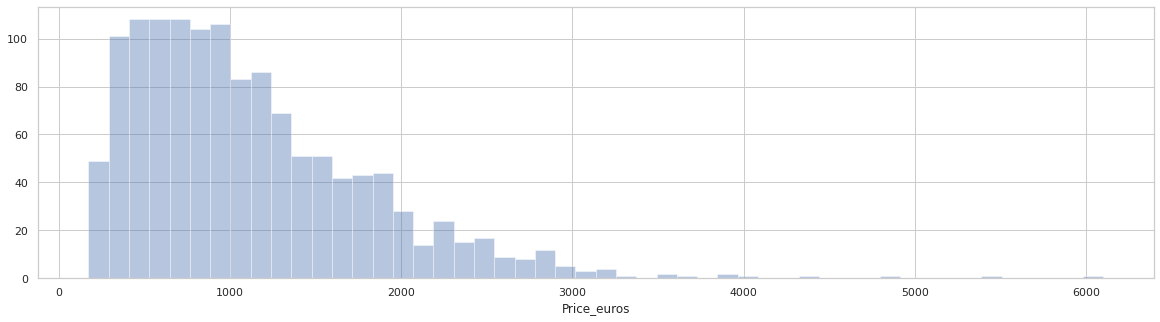

In [323]:
plt.figure(figsize=(20,5))
sns.distplot(df.Price_euros,bins=50, kde=False)

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


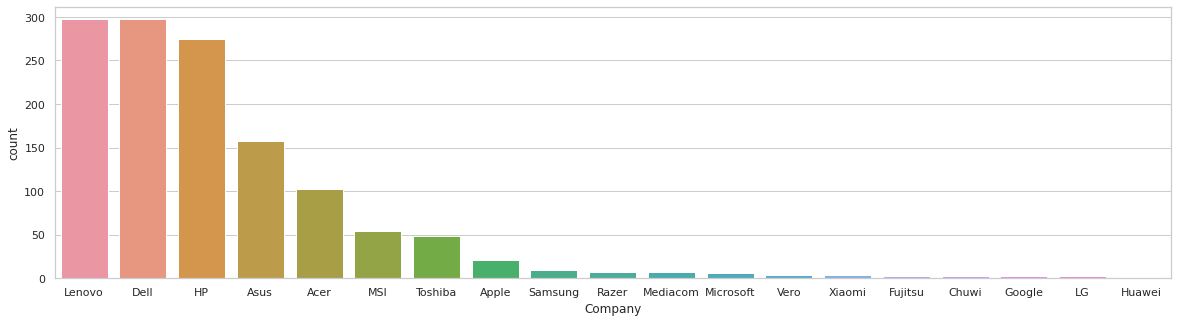

In [325]:
plt.figure(figsize=(20,5))
sns.countplot(data=df, x=df.Company, order = df['Company'].value_counts().index )

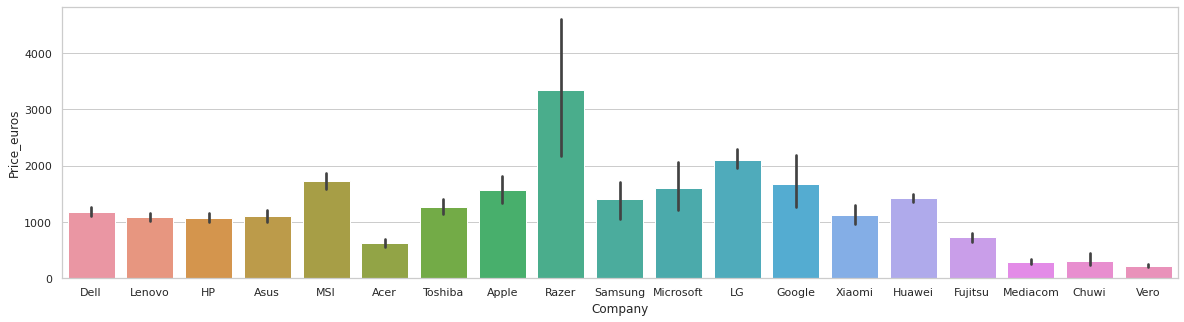

In [327]:
plt.figure(figsize=(20,5))
plot_order = df.groupby('Company')['Price_euros'].sum().sort_values(ascending=False).index.values
sns.barplot(data=df, x=df.Company, y=df.Price_euros, order=plot_order )

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 196 to 1215
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 182.5+ KB


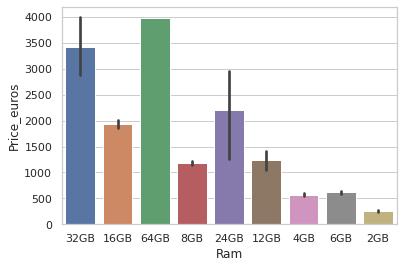

In [329]:
df.sort_values('Price_euros', inplace=True, ascending=False)
sns.barplot(data=df, x=df['Ram'], y=df['Price_euros'])

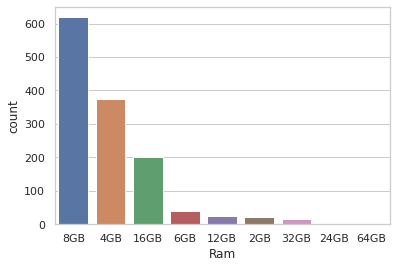

In [297]:
sns.countplot(data=df, x='Ram', order = df['Ram'].value_counts().index)

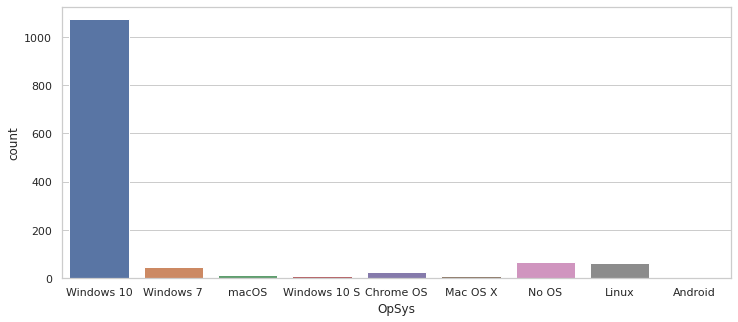

In [298]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='OpSys') #, y='Price_euros')

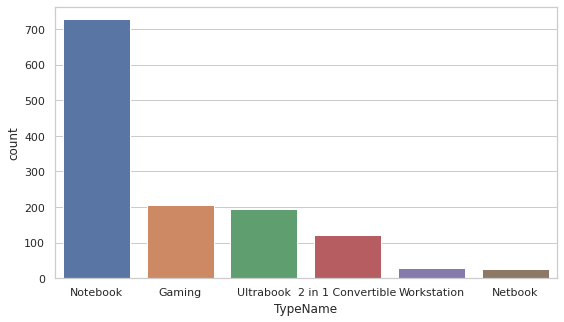

In [299]:
plt.figure(figsize=(9,5))
plot_order = df.groupby('TypeName')['Price_euros'].count().sort_values(ascending=False).index.values
sns.countplot(data=df, x='TypeName', order=plot_order)

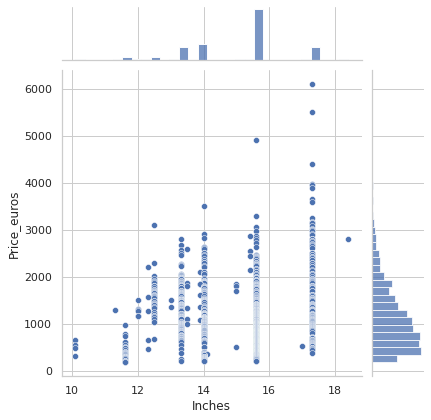

In [300]:
sns.jointplot(x='Inches',y='Price_euros', kind='scatter', data=df)

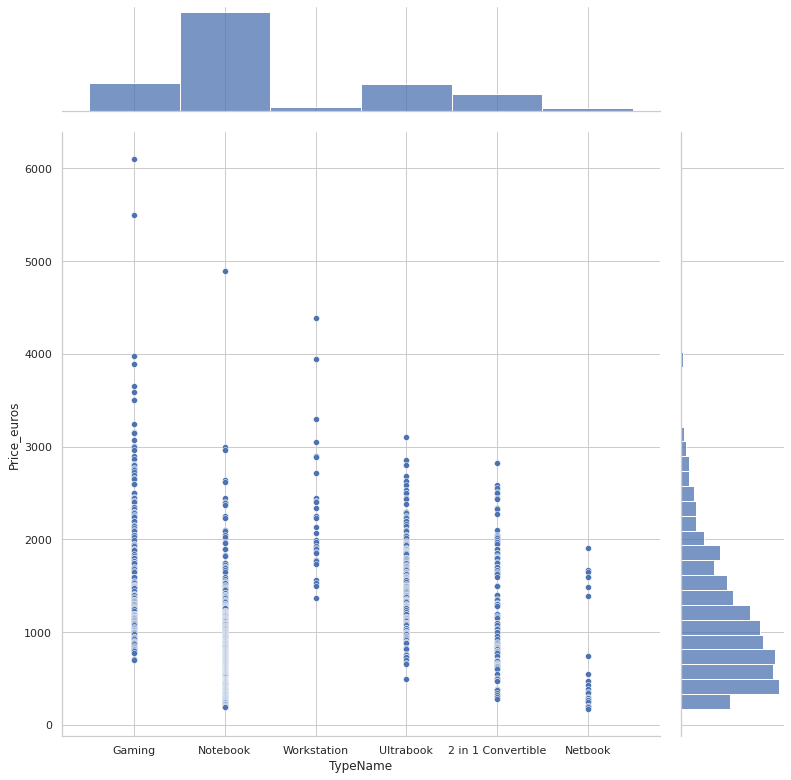

In [301]:
sns.jointplot(x='TypeName', y='Price_euros', kind='scatter', data=df, height=11)

# **Data Cleaning**

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 196 to 1215
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 182.5+ KB


In [303]:
df.reset_index()

,index,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,196,200,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32GB,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49kg,6099.0
1,830,839,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32GB,512GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49kg,5499.0
2,610,617,Lenovo,Thinkpad P51,Notebook,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Xeon E3-1535M v6 3.1GHz,32GB,1TB SSD,Nvidia Quadro M2200M,Windows 10,2.5kg,4899.0
3,749,758,HP,Zbook 17,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Xeon E3-1535M v5 2.9GHz,16GB,256GB SSD,Nvidia Quadro M2000M,Windows 7,3kg,4389.0
4,1066,1081,Asus,ROG G701VO,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,64GB,1TB SSD,Nvidia GeForce GTX 980,Windows 10,3.58kg,3975.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,290,295,Acer,Chromebook C910-C2ST,Notebook,15.6,1366x768,Intel Celeron Dual Core 3205U 1.5GHz,2GB,16GB SSD,Intel HD Graphics,Chrome OS,2.19kg,199.0
1299,31,32,Asus,E402WA-GA010T (E2-6110/2GB/32GB/W10),Notebook,14.0,1366x768,AMD E-Series E2-6110 1.5GHz,2GB,32GB Flash Storage,AMD Radeon R2,Windows 10,1.65kg,199.0
1300,1120,1135,Vero,V131 (X5-Z8350/4GB/32GB/FHD/W10),Notebook,13.3,Full HD 1920x1080,Intel Atom X5-Z8350 1.44GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.35kg,196.0
1301,20,21,Asus,Vivobook E200HA,Netbook,11.6,1366x768,Intel Atom x5-Z8350 1.44GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,0.98kg,191.9


In [304]:
df.Price_euros.sort_values().tail(10)

1231    3499.0
780     3588.8
723     3659.4
238     3890.0
1136    3949.4
1066    3975.0
749     4389.0
610     4899.0
830     5499.0
196     6099.0
Name: Price_euros, dtype: float64

In [250]:
#removing noisy values - prices over 3000
#df = df[df['Price_euros'] <= 3000]

# **Data Manipulation**

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 196 to 1215
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 182.5+ KB


In [183]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [184]:
df.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
196,200,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32GB,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49kg,6099.0
830,839,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32GB,512GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49kg,5499.0


In [185]:
df_Company = pd.get_dummies(df.Company, prefix='co_')
df_Product = pd.get_dummies(df.Product, prefix='prd_')
df_TypName = pd.get_dummies(df.TypeName, prefix='tpn_')
df_os = pd.get_dummies(df.OpSys, prefix='os_')

In [186]:
# Round inch information 
df.Inches = df.Inches.round()

# Ram to number
df.Ram = df.Ram.str.replace('GB','').astype(int)

# Weight to number
df.Weight = df.Weight.str.replace('kg','').astype(float)

# Memory to number
# memory split
df['Memory_SSD']= np.where(df.Memory.str.find("SSD")==-1,0,1)
df['Memory_Flash_Storage']= np.where(df.Memory.str.find("Flash Storage")==-1,0,1)
df['Memory_HDD']= np.where(df.Memory.str.find("HDD")==-1,0,1)
df['Memory_Hybrid']= np.where(df.Memory.str.find("Hybrid")==-1,0,1)
df['Storage_amt'] = df.Memory.str.split().str[0]
storage_map = {'1.0TB':'1000', '1TB':'1000', '2TB':'2000', '508':'500'}
df.Storage_amt.replace(storage_map , inplace=True)
df.Storage_amt = df.Storage_amt.str.replace('GB','').astype(int)

# Split Cpu information 
df['Cpu_brand'] = df.Cpu.str.split().str[0]
df['Cpu_speed'] = df.Cpu.str.split().str[-1]
df.Cpu_speed = df.Cpu_speed.str.split('GHz').str[0].astype(float)
#df['Cpu_model'] = 
df_Cpu_brand = pd.get_dummies(df.Cpu_brand, prefix='Cpu_')

# CPU
df['Cpu_HighSeries']=np.where((df.Cpu.str.split(" ",1).str[0]=="AMD") | (df.Cpu.str.split(" ",1).str[0]=="Samsung"),df.Cpu.str.split(" ",1).str[1].str.split(" ",1).str[0],
          np.where((df.Cpu.str.split(" ",1).str[0]=="Intel") & (df.Cpu.str.split(" ",1).str[1].str.split(" ",2).str[0].isin(['Xeon','Atom'])),df.Cpu.str.split(" ",1).str[1].str.split(" ",2).str[0],
          np.where(df.Cpu.str.split(" ",1).str[0]=="Intel",df.Cpu.str.split(" ",1).str[1].str.split(" ",2).str[0]+df.Cpu.str.split(" ",1).str[1].str.split(" ",2).str[1],     
          "missing")))
df_Cpu_HighSeries = pd.get_dummies(df.Cpu_HighSeries, prefix='CpuH_')

test1=df.Cpu.str.split().str[-2].str.split("-").str[-1]
test2=test1.apply(lambda x:re.findall(r'\d+|$',x)[0])
test2.replace([""],["0"],inplace=True)
test2=test2.astype(int)
df['Cpu_LowSeries']=np.where(test2<10,0,test2)

# Split Gpu information
df['Gpu_brand'] = df.Gpu.str.split().str[0]
df_Gpu_brand = pd.get_dummies(df.Gpu_brand, prefix='Gpu_')
df['Gpu_SubType']=np.where(df.Gpu.str.split(" ",2).str[1].isin(['Graphics','R17M-M1-70','Mali','R4']),'missing',df.Gpu.str.split(" ",2).str[1])
df_Gpu_SubType = pd.get_dummies(df.Gpu_SubType, prefix='GpuST_')

# Handle ScreenResolution information
df['Scr_to'] = df.ScreenResolution.str.split('x').str[-1].astype(int)
df['Scr_from'] = df.ScreenResolution.str.split('x').str[0]
df['Scr_from'] = df.Scr_from.str.split().str[-1].astype(int)
df['Scr_Touchscreen']=np.where(df.ScreenResolution.str.find("Touchscreen")>-1,1,0)
df['Scr_HD']=np.where(df.ScreenResolution.str.find("Full HD")>-1,'Full_HD',
                    np.where(df.ScreenResolution.str.find("Quad HD")>-1,'Quad_HD',
                    np.where(df.ScreenResolution.str.find("Ultra HD")>-1,'Ultra_HD',
                             'missing')))
df_Scr_HD = pd.get_dummies(df.Scr_HD, prefix='ScrHD_')

#Categorial change

In [187]:
def GroupPrice(GroupValue,dfOrg):
  df=dfOrg.groupby(GroupValue).agg({'Price_euros':[('avgPrice','mean'),('stdPrice',np.std)],'laptop_ID':[('countLaptop','count')]}).reset_index()
  df.columns=df.columns.droplevel(0)
  df.columns.values[0]=GroupValue
  df.sort_values('countLaptop',ascending=False,inplace=True)
  valueByPrice=df.sort_values('avgPrice',ascending=False)[GroupValue].tolist()
  print(valueByPrice)
  dict_map = dict(zip(valueByPrice, range(len(valueByPrice))))
  dfOrg.loc[:, GroupValue+'Num'] = dfOrg[GroupValue].map(dict_map)
  return dfOrg

In [188]:
df=GroupPrice('Company',df)
display(df[['Company','CompanyNum']].head(10))

['Razer', 'LG', 'MSI', 'Google', 'Microsoft', 'Apple', 'Huawei', 'Samsung', 'Toshiba', 'Dell', 'Xiaomi', 'Asus', 'Lenovo', 'HP', 'Fujitsu', 'Acer', 'Chuwi', 'Mediacom', 'Vero']


,Company,CompanyNum
196,Razer,0
830,Razer,0
610,Lenovo,12
749,HP,13
1066,Asus,11
1136,HP,13
238,Asus,11
723,Dell,9
780,Dell,9
1231,Razer,0


In [189]:
types=GroupPrice('TypeName',df)
display(types[['TypeName','TypeNameNum']].head(10))

['Workstation', 'Gaming', 'Ultrabook', '2 in 1 Convertible', 'Notebook', 'Netbook']


,TypeName,TypeNameNum
196,Gaming,1
830,Gaming,1
610,Notebook,4
749,Workstation,0
1066,Gaming,1
1136,Workstation,0
238,Gaming,1
723,Gaming,1
780,Gaming,1
1231,Gaming,1


In [190]:
df=GroupPrice('Scr_HD',df)
display(df[['Scr_HD','Scr_HDNum']].head(10))

['Ultra_HD', 'Quad_HD', 'Full_HD', 'missing']


,Scr_HD,Scr_HDNum
196,Ultra_HD,0
830,Ultra_HD,0
610,Ultra_HD,0
749,Full_HD,2
1066,Full_HD,2
1136,Full_HD,2
238,Full_HD,2
723,Ultra_HD,0
780,Full_HD,2
1231,Full_HD,2


In [191]:
df=GroupPrice('Cpu_HighSeries',df)
display(df[['Cpu_HighSeries','Cpu_HighSeriesNum']].head(10))

['Xeon', 'Ryzen', 'Corei7', 'CoreM', 'Corei5', 'FX', 'Cortex', 'A12-Series', 'A10-Series', 'PentiumDual', 'Corei3', 'A9-Series', 'A8-Series', 'PentiumQuad', 'A6-Series', 'CeleronQuad', 'A4-Series', 'Atom', 'CeleronDual', 'E-Series']


,Cpu_HighSeries,Cpu_HighSeriesNum
196,Corei7,2
830,Corei7,2
610,Xeon,0
749,Xeon,0
1066,Corei7,2
1136,Corei7,2
238,Corei7,2
723,Corei7,2
780,Corei7,2
1231,Corei7,2


In [192]:
df=GroupPrice('Gpu_brand',df)
display(df[['Gpu_brand','Gpu_brandNum']].head(10))

['Nvidia', 'Intel', 'AMD', 'ARM']


,Gpu_brand,Gpu_brandNum
196,Nvidia,0
830,Nvidia,0
610,Nvidia,0
749,Nvidia,0
1066,Nvidia,0
1136,Nvidia,0
238,Nvidia,0
723,Nvidia,0
780,Nvidia,0
1231,Nvidia,0


In [193]:
df=GroupPrice('Gpu_SubType',df)
display(df[['Gpu_SubType','Gpu_SubTypeNum']].head(10))

['GTX', 'Quadro', 'Iris', 'FirePro', 'GeForce', 'UHD', 'HD', 'Radeon', 'missing']


,Gpu_SubType,Gpu_SubTypeNum
196,GeForce,4
830,GeForce,4
610,Quadro,1
749,Quadro,1
1066,GeForce,4
1136,Quadro,1
238,GeForce,4
723,GeForce,4
780,GeForce,4
1231,GeForce,4


In [194]:
df=GroupPrice('OpSys',df)
display(df[['OpSys','OpSysNum']].head(10))

['macOS', 'Windows 7', 'Windows 10 S', 'Mac OS X', 'Windows 10', 'Linux', 'No OS', 'Chrome OS', 'Android']


,OpSys,OpSysNum
196,Windows 10,4
830,Windows 10,4
610,Windows 10,4
749,Windows 7,1
1066,Windows 10,4
1136,Windows 7,1
238,Windows 10,4
723,Windows 10,4
780,Windows 10,4
1231,Windows 10,4


In [195]:
df.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Memory_SSD,Memory_Flash_Storage,Memory_HDD,Memory_Hybrid,Storage_amt,Cpu_brand,Cpu_speed,Cpu_HighSeries,Cpu_LowSeries,Gpu_brand,Gpu_SubType,Scr_to,Scr_from,Scr_Touchscreen,Scr_HD,CompanyNum,TypeNameNum,Scr_HDNum,Cpu_HighSeriesNum,Gpu_brandNum,Gpu_SubTypeNum,OpSysNum
196,200,Razer,Blade Pro,Gaming,17.0,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,6099.0,1,0,0,0,1000,Intel,2.9,Corei7,7820,Nvidia,GeForce,2160,3840,1,Ultra_HD,0,1,0,2,0,4,4
830,839,Razer,Blade Pro,Gaming,17.0,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32,512GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,5499.0,1,0,0,0,512,Intel,2.9,Corei7,7820,Nvidia,GeForce,2160,3840,1,Ultra_HD,0,1,0,2,0,4,4


In [196]:
df_model=df[['Inches', 'Ram', 'Weight',  'Storage_amt', 'Cpu_speed', 'Scr_from', 'Scr_to','Memory_SSD','Memory_Flash_Storage','Memory_HDD','Memory_Hybrid','Cpu_LowSeries',
             'Scr_Touchscreen','CompanyNum','TypeNameNum','Scr_HDNum','Cpu_HighSeriesNum','Gpu_brandNum','Gpu_SubTypeNum','OpSysNum','Price_euros']].copy()

In [197]:
df_model.shape

(1303, 21)

In [227]:
df_model.loc[1000]

Inches                    16.0
Ram                        8.0
Weight                     2.7
Storage_amt              128.0
Cpu_speed                  2.8
Scr_from                1920.0
Scr_to                  1080.0
Memory_SSD                 1.0
Memory_Flash_Storage       0.0
Memory_HDD                 1.0
Memory_Hybrid              0.0
Cpu_LowSeries           7700.0
Scr_Touchscreen            0.0
CompanyNum                15.0
TypeNameNum                1.0
Scr_HDNum                  2.0
Cpu_HighSeriesNum          2.0
Gpu_brandNum               0.0
Gpu_SubTypeNum             4.0
OpSysNum                   4.0
Price_euros             1260.0
Name: 1000, dtype: float64

In [347]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 196 to 1215
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Inches                1303 non-null   float64
 1   Ram                   1303 non-null   int64  
 2   Weight                1303 non-null   float64
 3   Storage_amt           1303 non-null   int64  
 4   Cpu_speed             1303 non-null   float64
 5   Scr_from              1303 non-null   int64  
 6   Scr_to                1303 non-null   int64  
 7   Memory_SSD            1303 non-null   int64  
 8   Memory_Flash_Storage  1303 non-null   int64  
 9   Memory_HDD            1303 non-null   int64  
 10  Memory_Hybrid         1303 non-null   int64  
 11  Cpu_LowSeries         1303 non-null   int64  
 12  Scr_Touchscreen       1303 non-null   int64  
 13  CompanyNum            1303 non-null   int64  
 14  TypeNameNum           1303 non-null   int64  
 15  Scr_HDNum          

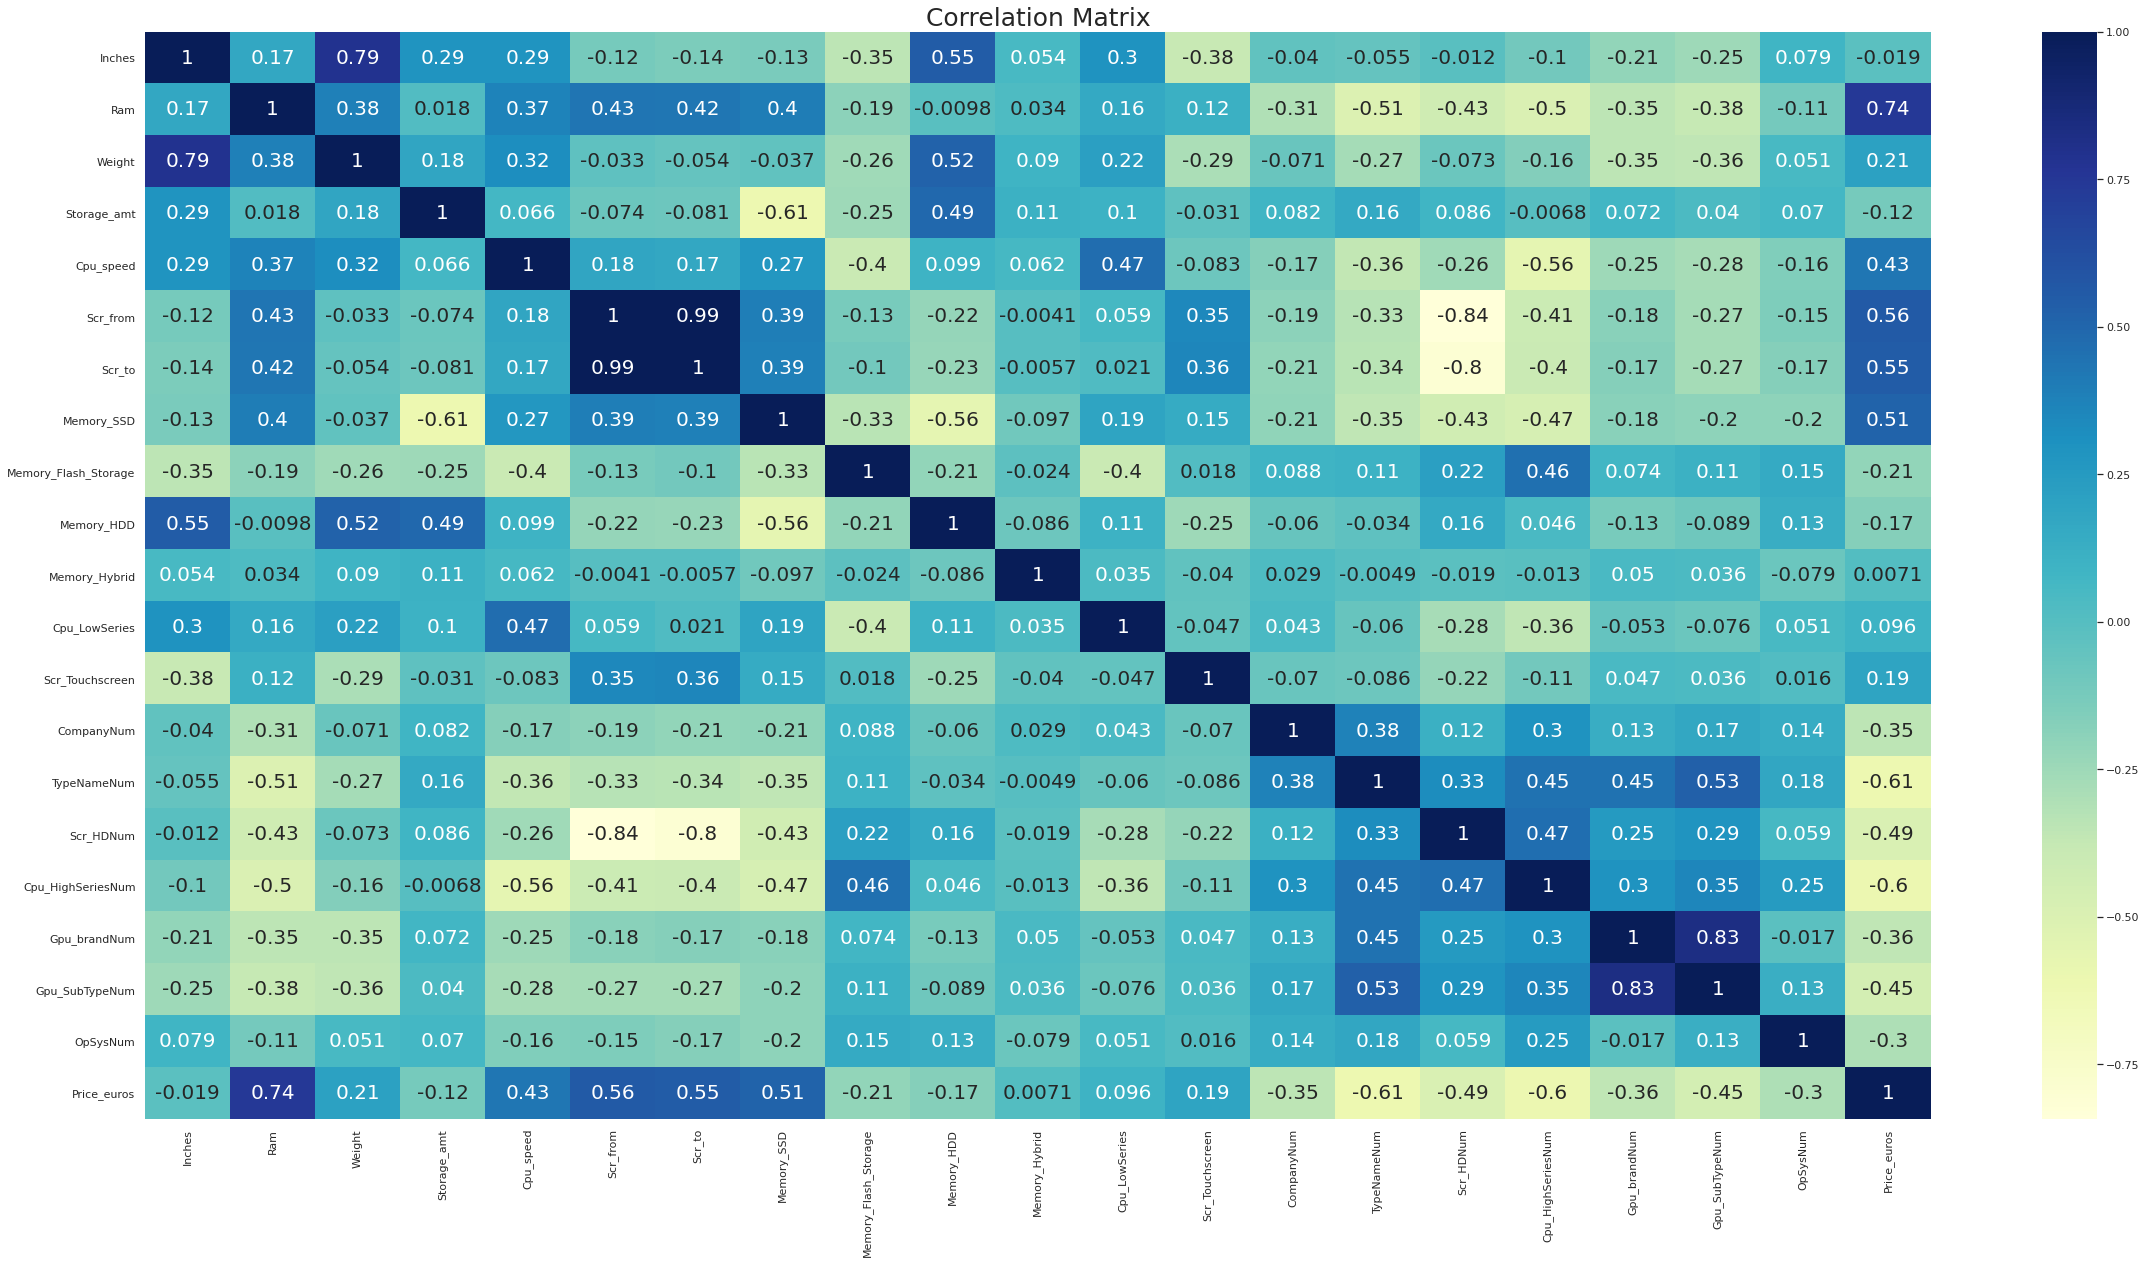

In [200]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(40,20))        
# Imbalanced DataFrame Correlation
corr = df_model.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':20},annot=True, ax=ax)
sns.set(font_scale=5)
ax.set_title("Correlation Matrix", fontsize=25)
plt.show()

In [201]:
sns.set(font_scale=2)

In [202]:
# # Combining the Data
# df_model = pd.merge(df[['Inches', 'Ram', 'Weight', 'Price_euros', 'Storage_amt', 'Cpu_speed', 'Scr_from', 'Scr_to','Memory_SSD','Memory_Flash_Storage','Memory_HDD','Memory_Hybrid','Cpu_LowSeries','Scr_Touchscreen']], df_Company, left_index=True, right_index=True)
# df_model = pd.merge(df_model, df_Product, left_index=True, right_index=True)
# df_model = pd.merge(df_model, df_TypName, left_index=True, right_index=True)
# df_model = pd.merge(df_model, df_os, left_index=True, right_index=True)
# df_model = pd.merge(df_model, df_Cpu_brand, left_index=True, right_index=True)
# df_model = pd.merge(df_model, df_Gpu_brand, left_index=True, right_index=True)
# df_model = pd.merge(df_model, df_Cpu_HighSeries, left_index=True, right_index=True)
# df_model = pd.merge(df_model, df_Gpu_SubType, left_index=True, right_index=True)
# df_model = pd.merge(df_model, df_Scr_HD, left_index=True, right_index=True)
# #df.drop(['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys'], axis=1, inplace=True)

# df_model.head(2)

In [203]:
df_model.shape

(1303, 21)

In [204]:
def rmsle(a,b):
    return msle(a,b) ** 0.5

In [351]:
df_model.sort_index('index', inplace=True)

In [352]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Inches                1303 non-null   float64
 1   Ram                   1303 non-null   int64  
 2   Weight                1303 non-null   float64
 3   Storage_amt           1303 non-null   int64  
 4   Cpu_speed             1303 non-null   float64
 5   Scr_from              1303 non-null   int64  
 6   Scr_to                1303 non-null   int64  
 7   Memory_SSD            1303 non-null   int64  
 8   Memory_Flash_Storage  1303 non-null   int64  
 9   Memory_HDD            1303 non-null   int64  
 10  Memory_Hybrid         1303 non-null   int64  
 11  Cpu_LowSeries         1303 non-null   int64  
 12  Scr_Touchscreen       1303 non-null   int64  
 13  CompanyNum            1303 non-null   int64  
 14  TypeNameNum           1303 non-null   int64  
 15  Scr_HDNum            

# **Decision Tree Model**

In [353]:
X = df_model.drop('Price_euros', axis=1)
y = df_model['Price_euros']
feature_list = list(X.columns)

In [354]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=314159)

In [355]:
#model = RandomForestClassifier()
model = DecisionTreeRegressor(max_depth=6, min_samples_leaf=4,min_samples_split=16).fit(X_train, y_train)

In [356]:
y_train_pred = model.predict(X_train)

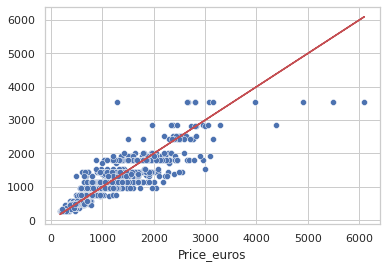

In [357]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')
# sns.set(font_scale=1.2)

In [358]:
RMSE = mse(y_train, y_train_pred)**0.5
RMSE

333.15973906898427

In [211]:
y_test_pred = model.predict(X_test)

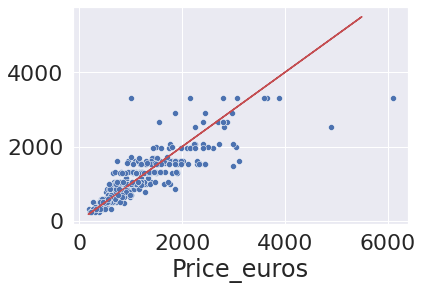

In [212]:
ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_train, y_train, 'r')

In [213]:
RMSE = mse(y_test, y_test_pred)**0.5
RMSE

387.2518854957241

In [214]:
RMSLE = rmsle(y_test, y_test_pred.clip(min=0)) 
RMSLE

0.2581204704559309

In [215]:
RMSP = np.round(100*(np.expm1(RMSLE)), 2)
RMSP

29.45

Text(0.5, 21.92, 'prediction error')

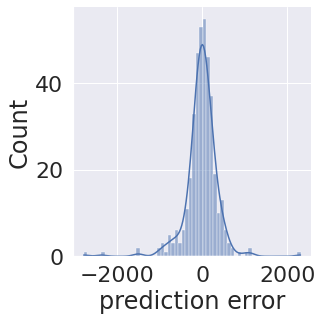

In [216]:
sns.displot(y_test_pred - y_test, kde=True)
plt.xlabel('prediction error')

In [217]:
testDf=pd.DataFrame({'y_test': y_test, 'y_test_pred': y_test_pred})

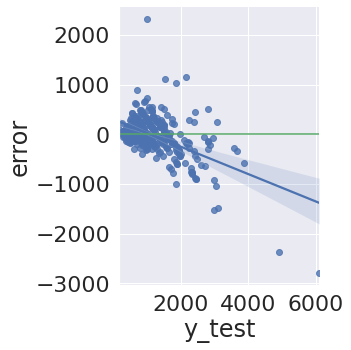

In [218]:
sns.lmplot(
    x='y_test', 
    y='error',
    data=testDf.assign(error = testDf['y_test_pred'] - testDf['y_test'])
)
#plt.ylim(np.array(plt.xlim())*1.2)
plt.axhline(0, c='g')

Text(0.5, 0, 'min samples per leaf')

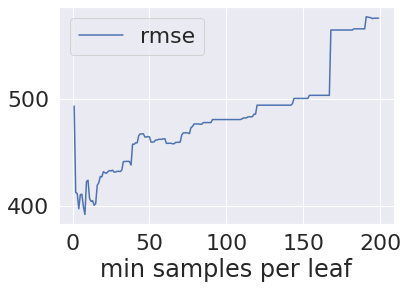

In [219]:
rmse_list = []

min_samples_leaf_range = range(1, 200)

result = pd.DataFrame(index=min_samples_leaf_range, columns =['rmse'])

for i in min_samples_leaf_range:
    model = DecisionTreeRegressor(min_samples_leaf=i)
    model.fit(X_train, y_train)
    y_fit = model.predict(X_test)
    rmse = np.sqrt(mse(y_test, y_fit))
    result.loc[i, 'rmse'] = rmse




result.plot()
plt.xlabel('min samples per leaf')

In [220]:
result.head(20)

,rmse
1,493.263
2,412.674
3,411.783
4,397.538
5,410.677
6,411.092
7,399.465
8,392.245
9,422.884
10,424.123


Text(0.5, 0, 'max depth')

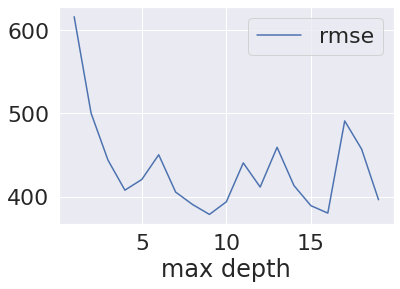

In [221]:
rmse_list = []

max_depth = range(1, 20)

result = pd.DataFrame(index=max_depth, columns =['rmse'])

for i in max_depth:
    model = DecisionTreeRegressor(max_depth=i)
    model.fit(X_train, y_train)
    y_fit = model.predict(X_test)
    rmse = np.sqrt(mse(y_test, y_fit))
    result.loc[i, 'rmse'] = rmse




result.plot()
plt.xlabel('max depth')

In [222]:
result.head(30)

,rmse
1,616.22
2,500.363
3,443.904
4,407.825
5,420.656
6,450.357
7,405.513
8,390.603
9,378.669
10,393.834


,rmse
2,462.05
3,443.429
4,451.813
5,434.375
6,443.08
7,432.171
8,388.921
9,386.967
10,424.865
11,389.433


Text(0.5, 0, 'min_samples_split')

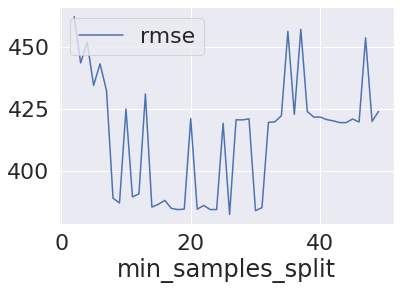

In [223]:
rmse_list = []

min_samples_split = range(2, 50)

result = pd.DataFrame(index=min_samples_split, columns =['rmse'])

for i in min_samples_split:
    model = DecisionTreeRegressor(min_samples_split=i)
    model.fit(X_train, y_train)
    y_fit = model.predict(X_test)
    rmse = np.sqrt(mse(y_test, y_fit))
    result.loc[i, 'rmse'] = rmse


display(result.head(30))
result.plot()
plt.xlabel('min_samples_split')

In [224]:
def visualize_tree(model, md=5):
    dot_data = StringIO()  
    export_graphviz(model, out_file=dot_data, feature_names=X_train.columns, max_depth=md)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]  
    return Image(graph.create_png(), width=800) 

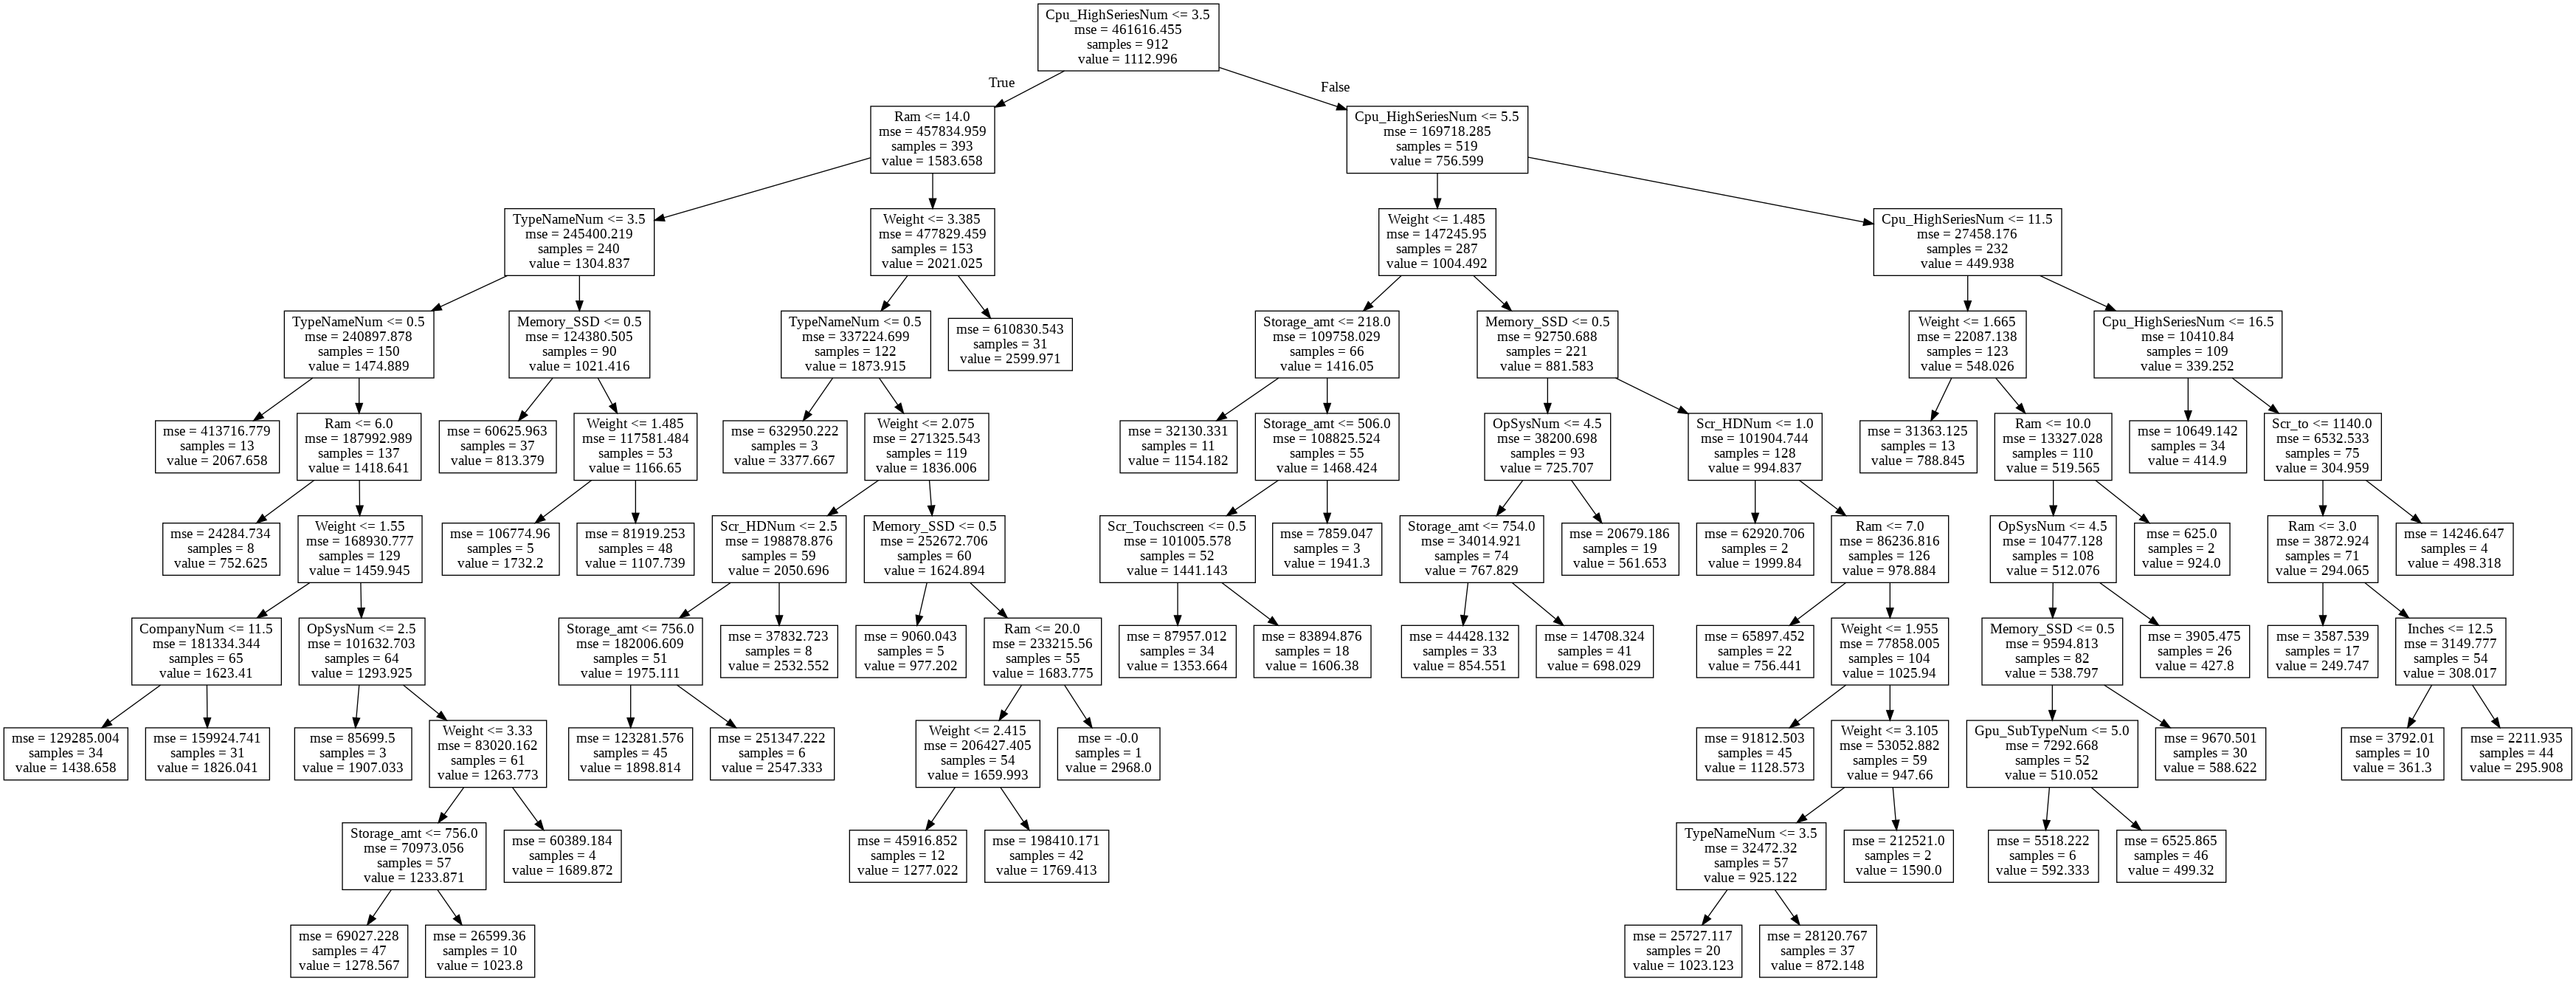

In [225]:
visualize_tree(model, md=10)

Text(0.5, 0, 'Relative Importance')

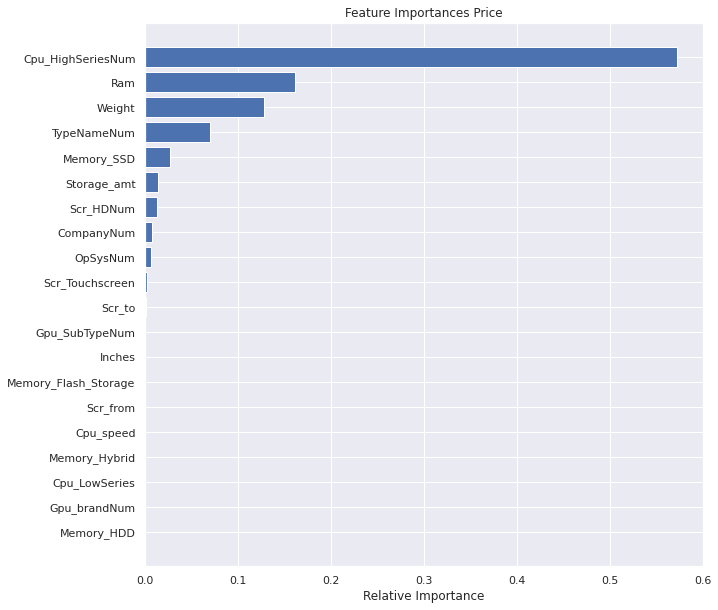

In [226]:
features=X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)
sns.set(font_scale=1)
plt.figure(figsize=(10,10))
plt.figure(1)
plt.title('Feature Importances Price')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

# remove Ram

In [75]:
X_train.columns

Index(['Inches', 'Ram', 'Weight', 'Storage_amt', 'Cpu_speed', 'Scr_from',
       'Scr_to', 'Memory_SSD', 'Memory_Flash_Storage', 'Memory_HDD',
       'Memory_Hybrid', 'Cpu_LowSeries', 'Scr_Touchscreen', 'CompanyNum',
       'TypeNameNum', 'Scr_HDNum', 'Cpu_HighSeriesNum', 'Gpu_brandNum',
       'Gpu_SubTypeNum', 'OpSysNum'],
      dtype='object')

In [76]:
X.shape

(1303, 20)

In [77]:
df_model.shape

(1303, 21)

In [78]:
X = df_model.drop(['Price_euros','Ram'], axis=1)
y = df_model['Price_euros']
feature_list = list(X.columns)

In [79]:
X.shape

(1303, 19)

In [80]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=314159)

In [81]:
#model = RandomForestClassifier()
model = DecisionTreeRegressor(max_depth=9, min_samples_leaf=15,min_samples_split=18).fit(X_train, y_train)

In [82]:
y_train_pred = model.predict(X_train)

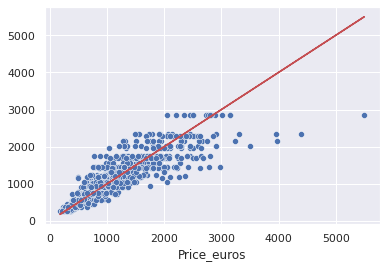

In [83]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')
sns.set(font_scale=1.2)

In [84]:
RMSE = mse(y_train, y_train_pred)**0.5
RMSE

329.7445463056822

In [85]:
y_test_pred = model.predict(X_test)

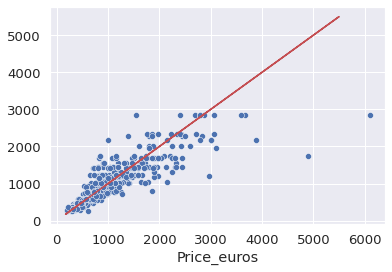

In [86]:
ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_train, y_train, 'r')

In [87]:
RMSE = mse(y_test, y_test_pred)**0.5
RMSE

419.0355308747376

In [88]:
RMSLE = rmsle(y_test, y_test_pred.clip(min=0)) 
RMSLE

0.27501830588748033

In [89]:
RMSP = np.round(100*(np.expm1(RMSLE)), 2)
RMSP

31.66

Text(0.5, 11.552000000000007, 'prediction error')

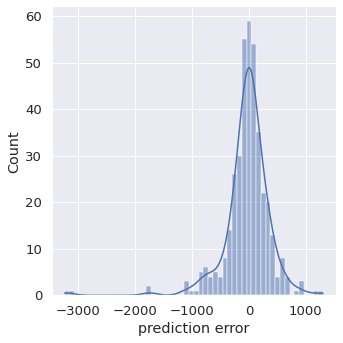

In [90]:
sns.displot(y_test_pred - y_test, kde=True)
plt.xlabel('prediction error')

In [91]:
testDf=pd.DataFrame({'y_test': y_test, 'y_test_pred': y_test_pred})

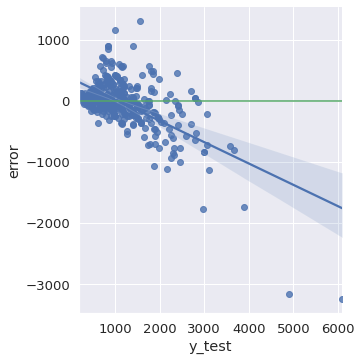

In [92]:
sns.lmplot(
    x='y_test', 
    y='error',
    data=testDf.assign(error = testDf['y_test_pred'] - testDf['y_test'])
)
#plt.ylim(np.array(plt.xlim())*1.2)
plt.axhline(0, c='g')

Text(0.5, 0, 'Relative Importance')

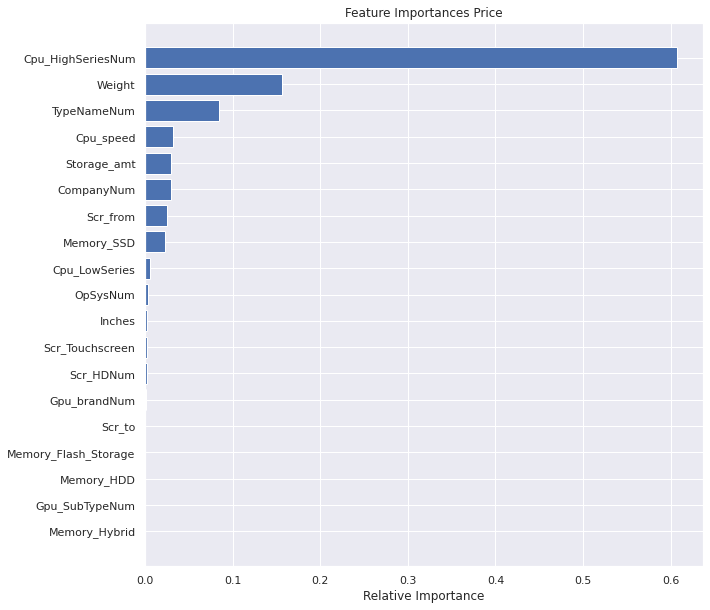

In [93]:
features=X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)
sns.set(font_scale=1)
plt.figure(figsize=(10,10))
plt.figure(1)
plt.title('Feature Importances Price')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

Text(0.5, 0, 'min samples per leaf')

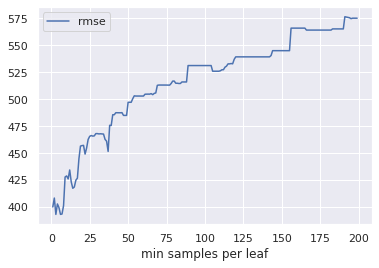

In [94]:
rmse_list = []

min_samples_leaf_range = range(1, 200)

result = pd.DataFrame(index=min_samples_leaf_range, columns =['rmse'])

for i in min_samples_leaf_range:
    model = DecisionTreeRegressor(min_samples_leaf=i)
    model.fit(X_train, y_train)
    y_fit = model.predict(X_test)
    rmse = np.sqrt(mse(y_test, y_fit))
    result.loc[i, 'rmse'] = rmse




result.plot()
plt.xlabel('min samples per leaf')

In [95]:
result.head(20)

,rmse
1,400.111
2,408.408
3,393.223
4,402.937
5,399.602
6,393.247
7,393.606
8,401.332
9,427.938
10,428.901


Text(0.5, 0, 'max depth')

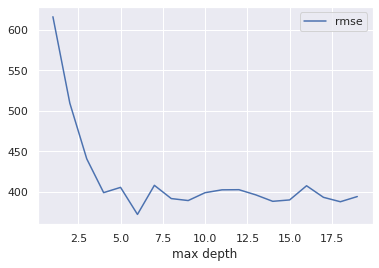

In [96]:
rmse_list = []

max_depth = range(1, 20)

result = pd.DataFrame(index=max_depth, columns =['rmse'])

for i in max_depth:
    model = DecisionTreeRegressor(max_depth=i)
    model.fit(X_train, y_train)
    y_fit = model.predict(X_test)
    rmse = np.sqrt(mse(y_test, y_fit))
    result.loc[i, 'rmse'] = rmse




result.plot()
plt.xlabel('max depth')

In [97]:
result.head(30)

,rmse
1,616.22
2,509.378
3,440.572
4,398.749
5,405.25
6,371.819
7,407.779
8,391.403
9,388.97
10,398.692


,rmse
2,412.493
3,382.734
4,368.188
5,366.975
6,363.316
7,364.044
8,360.204
9,364.259
10,378.341
11,367.768


Text(0.5, 0, 'min_samples_split')

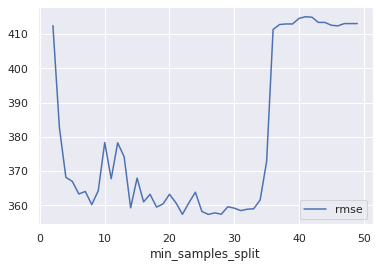

In [98]:
rmse_list = []

min_samples_split = range(2, 50)

result = pd.DataFrame(index=min_samples_split, columns =['rmse'])

for i in min_samples_split:
    model = DecisionTreeRegressor(min_samples_split=i)
    model.fit(X_train, y_train)
    y_fit = model.predict(X_test)
    rmse = np.sqrt(mse(y_test, y_fit))
    result.loc[i, 'rmse'] = rmse


display(result.head(30))
result.plot()
plt.xlabel('min_samples_split')

# remove all prediction more 3000



In [99]:
df_model_less3000=df_model[df_model['Price_euros']<=3000]

In [100]:
df_model_less3000.shape

(1284, 21)

In [101]:
X = df_model_less3000.drop(['Price_euros'], axis=1)
y = df_model_less3000['Price_euros']
feature_list = list(X.columns)

In [102]:
X.shape

(1284, 20)

In [103]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=314159)

Text(0.5, 0, 'min samples per leaf')

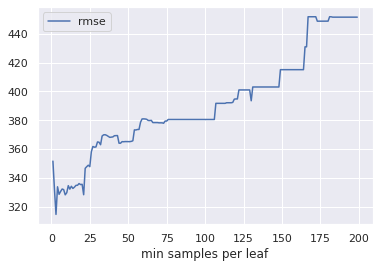

In [104]:
rmse_list = []

min_samples_leaf_range = range(1, 200)

result = pd.DataFrame(index=min_samples_leaf_range, columns =['rmse'])

for i in min_samples_leaf_range:
    model = DecisionTreeRegressor(min_samples_leaf=i)
    model.fit(X_train, y_train)
    y_fit = model.predict(X_test)
    rmse = np.sqrt(mse(y_test, y_fit))
    result.loc[i, 'rmse'] = rmse




result.plot()
plt.xlabel('min samples per leaf')

In [105]:
result.head(20)

,rmse
1,351.71
2,332.216
3,314.776
4,333.923
5,328.702
6,330.684
7,332.374
8,331.966
9,328.355
10,329.819


Text(0.5, 0, 'max depth')

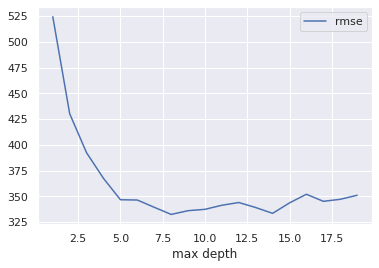

In [106]:
rmse_list = []

max_depth = range(1, 20)

result = pd.DataFrame(index=max_depth, columns =['rmse'])

for i in max_depth:
    model = DecisionTreeRegressor(max_depth=i)
    model.fit(X_train, y_train)
    y_fit = model.predict(X_test)
    rmse = np.sqrt(mse(y_test, y_fit))
    result.loc[i, 'rmse'] = rmse




result.plot()
plt.xlabel('max depth')

In [107]:
result.head(30)

,rmse
1,524.283
2,430.104
3,392.237
4,367.397
5,346.722
6,346.424
7,339.379
8,332.463
9,336.092
10,337.397


,rmse
2,346.766
3,339.802
4,342.796
5,340.924
6,329.016
7,329.412
8,326.995
9,328.012
10,332.392
11,329.744


Text(0.5, 0, 'min_samples_split')

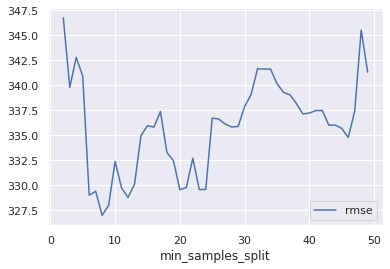

In [108]:
rmse_list = []

min_samples_split = range(2, 50)

result = pd.DataFrame(index=min_samples_split, columns =['rmse'])

for i in min_samples_split:
    model = DecisionTreeRegressor(min_samples_split=i)
    model.fit(X_train, y_train)
    y_fit = model.predict(X_test)
    rmse = np.sqrt(mse(y_test, y_fit))
    result.loc[i, 'rmse'] = rmse


display(result.head(30))
result.plot()
plt.xlabel('min_samples_split')

In [109]:
#model = RandomForestClassifier()
model = DecisionTreeRegressor(max_depth=8, min_samples_leaf=9,min_samples_split=18).fit(X_train, y_train)

In [110]:
y_train_pred = model.predict(X_train)

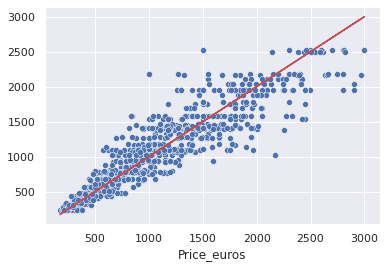

In [111]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')
sns.set(font_scale=1.2)

In [112]:
RMSE = mse(y_train, y_train_pred)**0.5
RMSE

244.2598154006814

In [113]:
y_test_pred = model.predict(X_test)

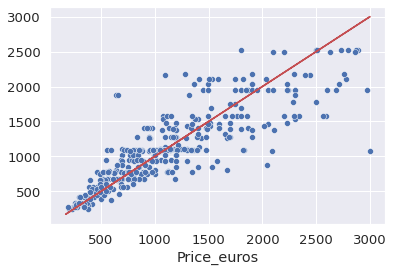

In [114]:
ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_train, y_train, 'r')

In [115]:
RMSE = mse(y_test, y_test_pred)**0.5
RMSE

328.38708072282094

In [116]:
RMSLE = rmsle(y_test, y_test_pred.clip(min=0)) 
RMSLE

0.25632610677558754

In [117]:
RMSP = np.round(100*(np.expm1(RMSLE)), 2)
RMSP

29.22

Text(0.5, 11.552000000000007, 'prediction error')

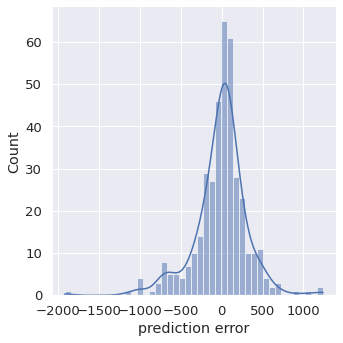

In [118]:
sns.displot(y_test_pred - y_test, kde=True)
plt.xlabel('prediction error')

In [119]:
testDf=pd.DataFrame({'y_test': y_test, 'y_test_pred': y_test_pred})

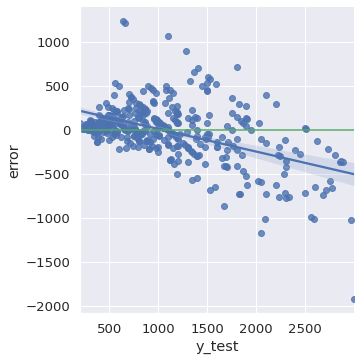

In [120]:
sns.lmplot(
    x='y_test', 
    y='error',
    data=testDf.assign(error = testDf['y_test_pred'] - testDf['y_test'])
)
#plt.ylim(np.array(plt.xlim())*1.2)
plt.axhline(0, c='g')

Text(0.5, 0, 'Relative Importance')

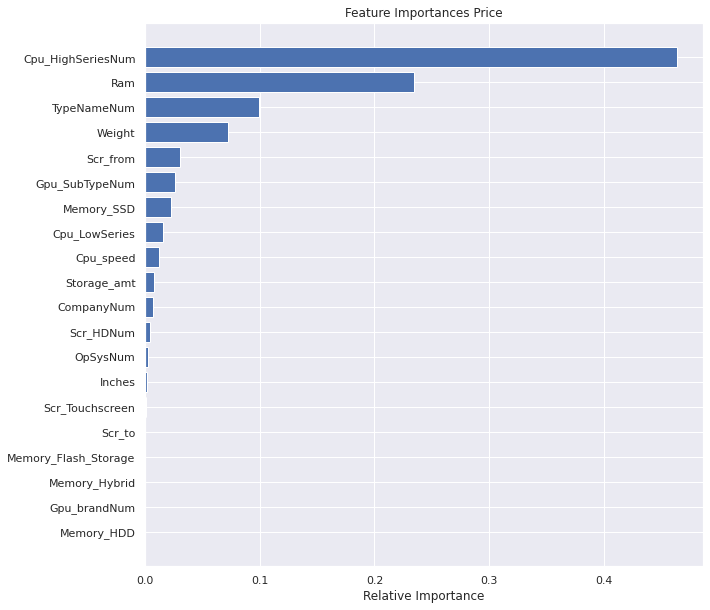

In [121]:
features=X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)
sns.set(font_scale=1)
plt.figure(figsize=(10,10))
plt.figure(1)
plt.title('Feature Importances Price')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

# Random Forest Model

In [122]:
X = df_model_less3000.drop('Price_euros', axis=1)
y = df_model_less3000['Price_euros']
feature_list = list(X.columns)

In [123]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=314159)

In [124]:
X.shape

(1284, 20)

In [125]:
# Baseline
# The baseline predictions are the historical averages
#baseline_preds = X_test[:, feature_list.index('average')]
# Baseline errors, and display average baseline error
#baseline_errors = abs(baseline_preds - y_test)
#print('Average baseline error: ', round(np.mean(baseline_errors), 2))

In [126]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [127]:
# Use the forest's predict method on the test data
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(y_test_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 186.36 degrees.


In [128]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 83.74 %.


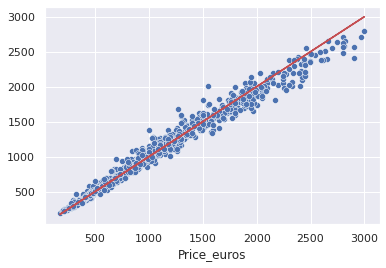

In [129]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')
sns.set(font_scale=1.2)

In [130]:
RMSE = mse(y_train, y_train_pred)**0.5
RMSE

93.39387773871874

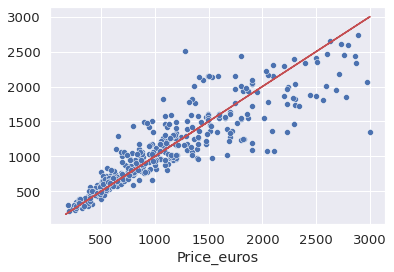

In [131]:
ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_train, y_train, 'r')

In [132]:
RMSE = mse(y_test, y_test_pred)**0.5
RMSE

287.0745715090578

In [133]:
RMSLE = rmsle(y_test, y_test_pred.clip(min=0)) 
RMSLE

0.2079278439418515

In [134]:
RMSP = np.round(100*(np.expm1(RMSLE)), 2)
RMSP

23.11

Text(0.5, 11.552000000000007, 'prediction error')

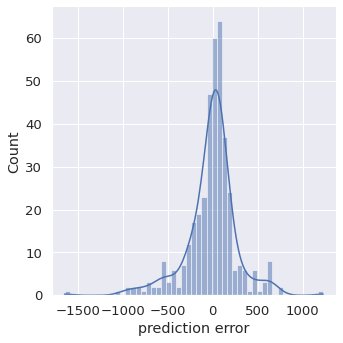

In [135]:
sns.displot(y_test_pred - y_test, kde=True)
plt.xlabel('prediction error')

In [136]:
testDf=pd.DataFrame({'y_test': y_test, 'y_test_pred': y_test_pred})

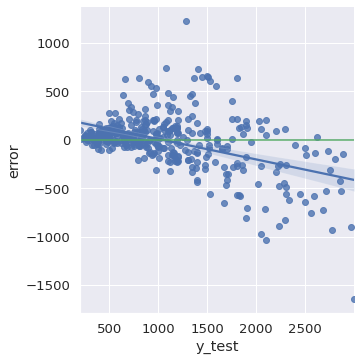

In [137]:
sns.lmplot(
    x='y_test', 
    y='error',
    data=testDf.assign(error = testDf['y_test_pred'] - testDf['y_test'])
)
#plt.ylim(np.array(plt.xlim())*1.2)
plt.axhline(0, c='g')

Text(0.5, 0, 'Relative Importance')

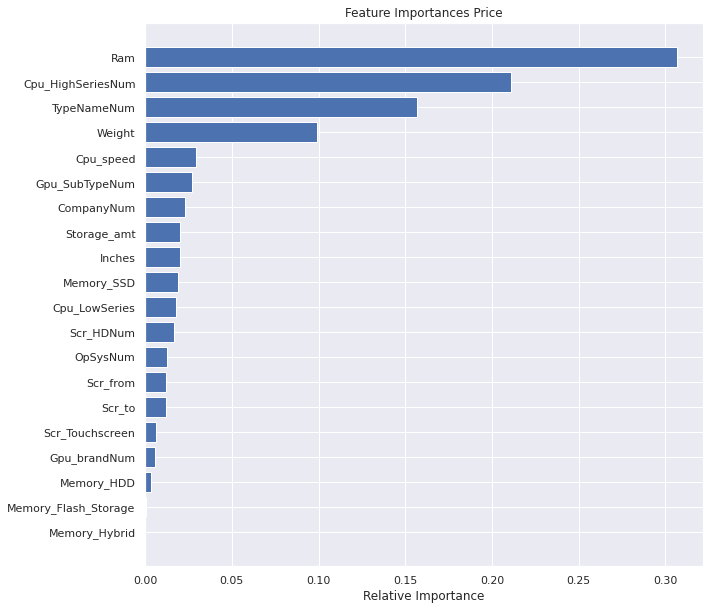

In [138]:
features=X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
sns.set(font_scale=1)
plt.figure(figsize=(10,10))
plt.figure(1)
plt.title('Feature Importances Price')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [139]:
def Grid_Search_CV_RFR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [10,200,500,1000],
            "max_features"      : ["auto", "sqrt", "log2"],
            "max_depth" :[4,8,10,12,16,20],
            "min_samples_split" : [2,4,8,10,12],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

In [140]:
Grid_Search_CV_RFR(X_train,y_train)

KeyboardInterrupt: ignored

# randomForest after Grid search

In [ ]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000,max_depth=12,max_features='log2',min_samples_split=2,bootstrap=False, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [ ]:
# Use the forest's predict method on the test data
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(y_test_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [ ]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')
sns.set(font_scale=1.2)

In [ ]:
RMSE = mse(y_train, y_train_pred)**0.5
RMSE

In [ ]:
ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_train, y_train, 'r')

In [ ]:
RMSE = mse(y_test, y_test_pred)**0.5
RMSE

In [ ]:
RMSLE = rmsle(y_test, y_test_pred.clip(min=0)) 
RMSLE

In [ ]:
RMSP = np.round(100*(np.expm1(RMSLE)), 2)
RMSP

In [ ]:

sns.set(rc={'figure.figsize':(15,13)})
sns.displot(y_test_pred - y_test, kde=True)
plt.xticks(list(range(-1500,1500,300)))
plt.xlabel('prediction error')
plt.show()

In [ ]:
testDf=pd.DataFrame({'y_test': y_test, 'y_test_pred': y_test_pred})

In [ ]:
sns.lmplot(
    x='y_test', 
    y='error',
    data=testDf.assign(error = testDf['y_test_pred'] - testDf['y_test'])
)
#plt.ylim(np.array(plt.xlim())*1.2)
plt.axhline(0, c='g')

In [ ]:
features=X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
sns.set(font_scale=1)
plt.figure(figsize=(10,10))
plt.figure(1)
plt.title('Feature Importances Price')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

# change columns type to category

In [ ]:
df_model_less3000.head(5)

In [ ]:
categoryCols=['CompanyNum','TypeNameNum','Scr_HDNum','Cpu_HighSeriesNum','Gpu_brandNum','Gpu_SubTypeNum','OpSysNum']

In [ ]:
df_modelSetCat=df_model_less3000.copy()
df_modelSetCat[categoryCols]=df_modelSetCat[categoryCols].apply(lambda x: x.astype('category'))

In [ ]:
df_modelSetCat.info()


In [ ]:
X = df_modelSetCat.drop('Price_euros', axis=1)
y = df_modelSetCat['Price_euros']
feature_list = list(X.columns)

In [ ]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=314159)

In [ ]:
X.shape

In [ ]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000,max_depth=12,max_features='log2',min_samples_split=2,bootstrap=False, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [ ]:
# Use the forest's predict method on the test data
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(y_test_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [ ]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')

In [ ]:
RMSE = mse(y_train, y_train_pred)**0.5
RMSE

In [ ]:
ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_train, y_train, 'r')

In [ ]:
RMSE = mse(y_test, y_test_pred)**0.5
RMSE

In [ ]:
RMSLE = rmsle(y_test, y_test_pred.clip(min=0)) 
RMSLE

In [ ]:
RMSP = np.round(100*(np.expm1(RMSLE)), 2)
RMSP

In [ ]:
features=X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
sns.set(font_scale=1)
plt.figure(figsize=(10,10))
plt.figure(1)
plt.title('Feature Importances Price')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

# split data

In [ ]:
df_modelMore3K=df_model[df_model['Price_euros']>1500]
df_modelLess3K=df_model[df_model['Price_euros']<=1500]
print(df_modelMore3K.shape)
print(df_modelLess3K.shape)

In [ ]:
def runModel(df_model_cat):
    X = df_model.drop('Price_euros', axis=1)
    y = df_model['Price_euros']
    feature_list = list(X.columns)
    X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=314159)
    X_train, X_test, y_train, y_test
    print(X.shape)
    # Instantiate model with 1000 decision trees
    rf = RandomForestRegressor(n_estimators = 1000,max_depth=12,max_features='log2',min_samples_split=2,bootstrap=False, random_state = 42)
    # Train the model on training data
    rf.fit(X_train, y_train)
    # Use the forest's predict method on the test data
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    # Calculate the absolute errors
    errors = abs(y_test_pred - y_test)
    # Print out the mean absolute error (mae)
    print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
    
    ax = sns.scatterplot(x=y_train, y=y_train_pred)
    ax.plot(y_train, y_train, 'r')
    plt.show()
    RMSE = mse(y_train, y_train_pred)**0.5
    print(' train RMSE is ', RMSE)
    ax = sns.scatterplot(x=y_test, y=y_test_pred)
    ax.plot(y_train, y_train, 'r')
    plt.show()
    RMSE = mse(y_test, y_test_pred)**0.5
    print('test RMSE is ',RMSE)

    RMSLE = rmsle(y_test, y_test_pred.clip(min=0)) 
    print('test RMSLE is ',RMSLE)
    
    RMSP = np.round(100*(np.expm1(RMSLE)), 2)
    print('test RMSLP is ',RMSP)
    features=X_train.columns
    
    importances = rf.feature_importances_
    indices = np.argsort(importances)
    sns.set(font_scale=1)
    plt.figure(figsize=(10,10))
    plt.figure(1)
    plt.title('Feature Importances Price')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), features[indices])
    plt.xlabel('Relative Importance')
    plt.show()
    
    pd.DataFrame({'y_test':y_test,'y_test_pred': y_test_pred})  
    
    return pd.concat([X_test,pd.DataFrame({'y_test':y_test,'y_test_pred': y_test_pred})],axis=1),pd.DataFrame({'y_train': y_train,'y_train_pred': y_train_pred}),rf

In [ ]:
def resModel(y_train, y_train_pred,y_test,y_test_pred):
    ax = sns.scatterplot(x=y_train, y=y_train_pred)
    ax.plot(y_train, y_train, 'r')
    plt.show()
    RMSE = mse(y_train, y_train_pred)**0.5
    print(' train RMSE is ', RMSE)
    ax = sns.scatterplot(x=y_test, y=y_test_pred)
    ax.plot(y_train, y_train, 'r')
    plt.show()
    RMSE = mse(y_test, y_test_pred)**0.5
    print('test RMSE is ',RMSE)

    RMSLE = rmsle(y_test, y_test_pred)# .clip(min=0) 
    print('test RMSLE is ',RMSLE)
    
    RMSP = np.round(100*(np.expm1(RMSLE)), 2)
    print('test RMSLP is ',RMSP)
    
#     sns.set(rc={'figure.figsize':(15,13)})
#     sns.displot(y_test_pred - y_test, kde=True)
#     plt.xticks(list(range(-1500,1500,300)))
#     plt.xlabel('prediction error')
#     plt.show()
    
    testDf=pd.DataFrame({'y_test': y_test, 'y_test_pred': y_test_pred})

    sns.lmplot(
        x='y_test', 
        y='error',
        data=testDf.assign(error = testDf['y_test_pred'] - testDf['y_test'])
    )
    #plt.ylim(np.array(plt.xlim())*1.2)
    plt.axhline(0, c='g')
    plt.show()
    
    return 

In [ ]:
resDFLess3K=runModel(df_modelLess3K)

In [ ]:
resDFLess3K[1].head(1)

In [ ]:
resDFMore3K=runModel(df_modelMore3K)

In [ ]:
resDfTestBoth=resDFMore3K[0].append(resDFLess3K[0])
resDfTrainBoth=resDFMore3K[1].append(resDFLess3K[1])
print(resDfTestBoth.shape)
print(resDfTrainBoth.shape)

In [ ]:
resDfTrainBoth.head()

In [ ]:
resDFMore3K[0].shape

In [ ]:
resModel(resDfTrainBoth.y_train,resDfTrainBoth.y_train_pred,resDfTestBoth.y_test,resDfTestBoth.y_test_pred)

# split less then 3000

In [ ]:
df_model_less3000.shape

In [ ]:
df_modelMore15K=df_model_less3000[df_model_less3000['Price_euros']>1500]
df_modelLess15K=df_model_less3000[df_model_less3000['Price_euros']<=1500]
print(df_modelMore3K.shape)
print(df_modelLess3K.shape)

In [ ]:
resDFLess15K=runModel(df_modelLess15K)

In [ ]:
resDFMore15K=runModel(df_modelMore15K)

In [ ]:
resDfTestBoth=resDFMore15K[0].append(resDFLess15K[0])
resDfTrainBoth=resDFMore15K[1].append(resDFLess15K[1])
print(resDfTestBoth.shape)
print(resDfTrainBoth.shape)

In [ ]:
resModel(resDfTrainBoth.y_train,resDfTrainBoth.y_train_pred,resDfTestBoth.y_test,resDfTestBoth.y_test_pred)

In [ ]:
pd.set_option('display.max_columns', 25)

In [ ]:
resDfTestBoth.columns

In [ ]:
resDfTestBoth['Error']=abs(resDfTestBoth['y_test']-resDfTestBoth['y_test_pred'])

In [ ]:
resDfTestBoth.sort_values('Error',ascending=False).head(10)

In [ ]:
companies=df[['Company','CompanyNum']].drop_duplicates()

companies.head()

In [ ]:
resDfTestBoth.info()

In [ ]:

resDfTestBoth.merge(companies,on='CompanyNum',how='inner')\
    .sort_values('Error',ascending=False)\
    [['Weight','Ram','Storage_amt','Cpu_speed','Company','CompanyNum','Cpu_HighSeriesNum','Memory_SSD','Cpu_LowSeries',
      'y_test_pred','y_test','Error']].head(10)

In [ ]:

resDfTestBoth.merge(companies,on='CompanyNum',how='inner')\
    .sort_values('Error',ascending=False)\
    [['Weight','Ram','Storage_amt','Cpu_speed','Company','CompanyNum','Cpu_HighSeriesNum','Memory_SSD','Cpu_LowSeries',
      'y_test_pred','y_test','Error']].tail(10)

# final df

In [ ]:
modelsDF=pd.DataFrame(columns=['ModelType','ModelDescription','RMSE train','RMSE test','RMSLE test','RMSP test'])
modelsDF.head()

In [ ]:
modelsDF=modelsDF.append({'ModelType':'DecisionTree','ModelDescription':'all categorial peatures in on column','RMSE train':333,
                 'RMSE test':330,'RMSLE test':0.25,'RMSP test':28.69},ignore_index=True)
modelsDF=modelsDF.append({'ModelType':'DecisionTree','ModelDescription':'remove Ram as higher importance','RMSE train':354,
                 'RMSE test':346,'RMSLE test':0.26,'RMSP test':30.01},ignore_index=True)
modelsDF=modelsDF.append({'ModelType':'DecisionTree','ModelDescription':'filtter  rows with price more than 3000','RMSE train':271,
                 'RMSE test':272,'RMSLE test':0.24,'RMSP test':27.14},ignore_index=True)
modelsDF=modelsDF.append({'ModelType':'RandomForest','ModelDescription':'default Hyper parameters with 1000 estimators','RMSE train':93,
                 'RMSE test':287,'RMSLE test':0.20,'RMSP test':23.1},ignore_index=True)
modelsDF=modelsDF.append({'ModelType':'RandomForest','ModelDescription':'add hyper parameters after grid search','RMSE train':112,
                 'RMSE test':277,'RMSLE test':0.20,'RMSP test':22.88},ignore_index=True)
modelsDF=modelsDF.append({'ModelType':'RandomForest','ModelDescription':'change categorial columns to categoty type','RMSE train':112,
                 'RMSE test':277,'RMSLE test':0.20,'RMSP test':22.88},ignore_index=True)
modelsDF=modelsDF.append({'ModelType':'RandomForest','ModelDescription':'split data for two models with more and less than 1500 price.without filter of more 3000','RMSE train':74,
                 'RMSE test':228,'RMSLE test':0.15,'RMSP test':17.29},ignore_index=True)
modelsDF=modelsDF.append({'ModelType':'RandomForest','ModelDescription':'split data for two models with more and less than 1500 price.with filterof more 3000','RMSE train':67,
                 'RMSE test':185,'RMSLE test':0.15,'RMSP test':16.71},ignore_index=True)


In [ ]:
modelsDF

In [ ]:
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
#(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
#graph.write_png('tree.png')

In [ ]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [ ]:
### display small_tree.png
Image(filename='small_tree.png') 

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];